<a href="https://colab.research.google.com/github/Amrith-ops/Identify-the-Sentiment/blob/master/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import shutil
import pandas as pd
import seaborn as sb
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [0]:
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

In [0]:
pip install textblob

In [0]:
pip install profanity-check

In [0]:
os.chdir('/content/drive/My Drive/NLP/Project1-Sentiment Analysis')

In [0]:
train_text=pd.read_csv('/content/drive/My Drive/NLP/Project1-Sentiment Analysis/train_2kmZucJ.csv')

In [0]:
test_text=pd.read_csv('/content/drive/My Drive/NLP/Project1-Sentiment Analysis/test_oJQbWVk.csv')

In [0]:
print(train_text.shape)
print(test_text.shape)


(7920, 3)
(1953, 2)


In [0]:
from textblob import Word

In [0]:
train_text.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [0]:
test_text.head()

,id,tweet,hate_prob
0,7921,hate new iphone upgrade let download apps ugh ...,0.445458
1,7922,currently shitting fucking pants apple imac ca...,0.876793
2,7923,i'd like puts cdroms ipad possible' — yes bloc...,0.080861
3,7924,ipod officially dead lost pictures videos sos ...,0.071172
4,7925,fighting itunes night want music paid,0.115834


In [0]:
count_labels=Counter(train_text.loc[:,'label'])

In [0]:
print(count_labels)

Counter({0: 5894, 1: 2026})


<BarContainer object of 2 artists>

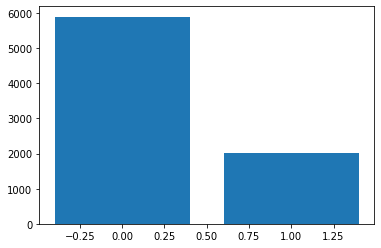

In [0]:
plt.bar(list(count_labels.keys()),list(count_labels.values()))

In [0]:
train_text.isnull().sum() #So no missing values

id           0
label        0
tweet        0
hate_prob    0
dtype: int64

In [0]:
import re

In [0]:
def preprocess_data(train_text):
  raw_text=[i for i in train_text['tweet']]
  html_removed=[re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',i) for i in raw_text] #Remove the urls from the text data
  pattern='(?:[0-9]|…|[\#\$\@\&\!\,\:\<\>\%\@\.\)\()\?\-\_\^\*\+\=\;\}\{\[\]])+'
  raw_text1=[i for i in html_removed]                                            #Removing the non text characters
  clean_data=[re.sub(pattern,'',i)for i in raw_text1]
  lower=[j.lower() for j in clean_data]                                      # converting all text into lowercase
  strip=[j.strip() for j in lower]
  cleaned_spell=[]                                                          #correcting the spellings if there are any
  stopword=set(stopwords.words('english'))
  for k in strip:
    s=''
    for m in k.split():
      if m not in stopword:
        spell=Word(m)
        s=s+spell+' '
    s=s.strip()
    cleaned_spell.append(s)
  return(cleaned_spell)
cleaned_data=preprocess_data(train_text)

In [0]:
cleaned_test=preprocess_data(test_text)

In [0]:
train_text.loc[:,'tweet']=cleaned_data

In [0]:
test_text.loc[:,'tweet']=cleaned_test

In [0]:
train_text.head(5)

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,i'm wired know i'm george made way iphone cute...
4,5,1,amazing service apple even talk question unles...


In [0]:
test_text.head()

,id,tweet
0,7921,hate new iphone upgrade let download apps ugh ...
1,7922,currently shitting fucking pants apple imac ca...
2,7923,i'd like puts cdroms ipad possible' — yes bloc...
3,7924,ipod officially dead lost pictures videos sos ...
4,7925,fighting itunes night want music paid


In [0]:
#feature engineering

In [0]:
from profanity_check import predict,predict_prob
x=predict_prob(train_text.loc[:,'tweet'])
y=predict(train_text.loc[:,'tweet'])
test=predict_prob(test_text.loc[:,'tweet'])

In [0]:
train_text.loc[:,'hate_prob']=x

In [0]:
test_text.loc[:,'hate_prob']=test


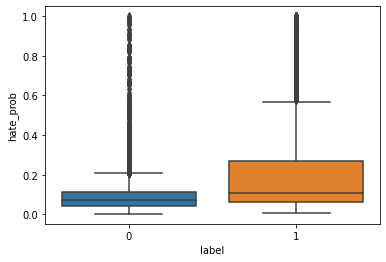

In [0]:
sb.boxplot(x=train_text.loc[:,'label'],y=train_text.loc[:,'hate_prob'])

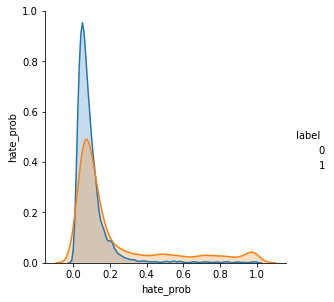

In [0]:
sb.pairplot(train_text.loc[:,['label','hate_prob']],hue='label',height=4)

In [0]:
train_text.loc[:,['label','hate_prob']].corr()

,label,hate_prob
label,1.000000,0.338324
hate_prob,0.338324,1.000000


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv=train_test_split(train_text.loc[:,['tweet','hate_prob']],train_text.loc[:,'label'],test_size=0.2)

In [0]:
print(X_train.shape,y_train.shape)
print(X_cv.shape,y_cv.shape)

(6336, 2) (6336,)
(1584, 2) (1584,)


In [0]:
from collections import Counter
word_tokens=[]
for i in train_text.loc[:,'tweet']:
  for j in i.split():
    word_tokens.append(j)

In [0]:
word_count=Counter(word_tokens)
print(word_count)

Counter({'iphone': 4019, 'apple': 2846, 'samsung': 1407, 'new': 1140, 'phone': 955, 'sony': 849, 'follow': 723, 'ipad': 523, 'like': 431, 'love': 429, 'life': 415, 'android': 410, 'ios': 381, 'rt': 378, 'day': 373, 'instagram': 358, 'cute': 328, 'photo': 321, 'gain': 310, 'today': 304, 'get': 297, 'galaxy': 294, 'photography': 294, 'back': 287, 'fun': 282, 'got': 280, 'case': 273, 'news': 265, 'music': 264, "i'm": 252, 'instagood': 250, 'app': 240, 'beautiful': 235, 'happy': 235, 'funny': 224, 'time': 221, 'fashion': 219, 'lol': 217, 'smile': 212, 'itunes': 211, 'one': 210, 'tech': 206, 'birthday': 205, 'work': 202, 'iphonex': 201, 'ipod': 199, 'ps': 198, 'photooftheday': 195, 'finally': 189, 'good': 182, 'everyone': 182, 'amazing': 178, 'make': 176, 'girl': 175, 'apps': 174, 'must': 168, 'sougofollow': 165, 'note': 162, 'mac': 162, 'update': 161, 'selfie': 161, 'followers': 159, "can't": 158, 'fail': 153, 'thanks': 150, 'igers': 147, 'free': 147, 'rts': 147, 'would': 146, 'home': 146,

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
count=CountVectorizer(min_df=5)
count.fit(X_train['tweet'])
onehottr=count.transform(X_train['tweet'])
onehotcv=count.transform(X_cv['tweet'])
onehottest=count.transform(test_text['tweet'])

In [0]:
print(onehottr.shape,y_train.shape)
print(onehotcv.shape,y_cv.shape)
print(onehottest.shape)

(6336, 1940) (6336,)
(1584, 1940) (1584,)
(1953, 1940)


In [0]:
from scipy.sparse import csr_matrix

In [0]:
final_tr=np.hstack((onehottr.toarray(),X_train['hate_prob'].values.reshape(-1,1)))
final_cv=np.hstack((onehotcv.toarray(),X_cv['hate_prob'].values.reshape(-1,1)))
final_test=np.hstack((onehottest.toarray(),test_text['hate_prob'].values.reshape(-1,1)))

In [0]:
#Hyperparameter tuning

In [0]:
log=LogisticRegression()

In [0]:
c=[0.001,0.1,1,5]
trauc=[]
cvauc=[]
for i in c:
  log=LogisticRegression(C=i,max_iter=1000)
  log.fit(final_tr,y_train.values)
  predicted_tr=log.predict_proba(final_tr)
  predicted_cv=log.predict_proba(final_cv)
  train_auc=roc_auc_score(y_train.values,predicted_tr[:,1])
  cv_auc=roc_auc_score(y_cv.values,predicted_cv[:,1])
  trauc.append(train_auc)
  cvauc.append(cv_auc)

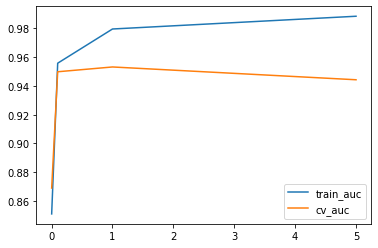

In [0]:
plt.plot(c,trauc,label='train_auc')
plt.plot(c,cvauc,label='cv_auc')
plt.legend()
plt.show()

In [0]:
log1=LogisticRegression(C=1)
log1.fit(final_tr,y_train.values)
test_predict=log1.predict(final_tr)
test_predictcv=log1.predict(final_cv)
test_predicttest=log1.predict(final_test)

In [0]:

f1_score(y_train.values,test_predict,average='weighted')

0.9341248021921539

In [0]:
f1_score(y_cv.values,test_predictcv,average='weighted')

0.8862907968909759

In [0]:
v=pd.DataFrame(test_text['id'].values,columns=['id'])
v.loc[:,'labels']=test_predicttest
v.to_csv('/content/drive/My Drive/NLP/Project1-Sentiment Analysis/clean1.csv')

In [0]:
#Trying tf_idf approach

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tfidf=TfidfVectorizer(min_df=5)

In [0]:
tfidf.fit(X_train['tweet'])
tfidftr=tfidf.transform(X_train['tweet'])
tfidfcv=tfidf.transform(X_cv['tweet'])
tfidftest=tfidf.transform(test_text['tweet'])

In [0]:
print(tfidftr.shape,y_train.shape)
print(tfidfcv.shape,y_cv.shape)
print(tfidftest.shape)

(6336, 1918) (6336,)
(1584, 1918) (1584,)
(1953, 1918)


In [0]:
from scipy.sparse import csr_matrix

In [0]:
tffinal_tr=(np.hstack((tfidftr.toarray(),X_train['hate_prob'].values.reshape(-1,1))))
tffinal_cv=(np.hstack((tfidfcv.toarray(),X_cv['hate_prob'].values.reshape(-1,1))))
tffinal_test=(np.hstack((tfidftest.toarray(),test_text['hate_prob'].values.reshape(-1,1))))

In [0]:
c=[0.001,0.1,1,5]
tf_trauc=[]
tf_cvauc=[]
for i in c:
  logi=LogisticRegression(C=i,max_iter=1000)
  logi.fit(tffinal_tr,y_train.values)
  predicted_tr=logi.predict_proba(tffinal_tr)
  predicted_cv=logi.predict_proba(tffinal_cv)
  train_auc=roc_auc_score(y_train,predicted_tr[:,1])
  cv_auc=roc_auc_score(y_cv,predicted_cv[:,1])
  tf_trauc.append(train_auc)
  tf_cvauc.append(cv_auc)

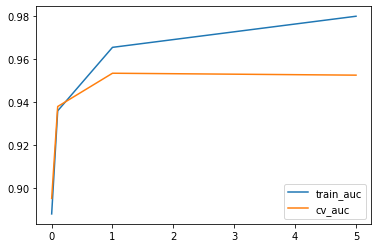

In [0]:
plt.plot(c,tf_trauc,label='train_auc')
plt.plot(c,tf_cvauc,label='cv_auc')
plt.legend()
plt.show()

In [0]:
log1=LogisticRegression(C=1)
log1.fit(tffinal_tr,y_train.values)
test_predict=log1.predict(tffinal_tr)
test_predictcv=log1.predict(tffinal_cv)

In [0]:
f1_score(y_train,test_predict,average='weighted')

0.9055165914738665

In [0]:
f1_score(y_cv,test_predictcv,average='weighted')

0.8831444581374511

In [0]:
#trying trigrams in tfidf vectorizer

In [0]:
tfidf_gram=TfidfVectorizer(min_df=5,ngram_range=(2,2))


In [0]:
tfidf_gram.fit(X_train['tweet'])
tfidftr_gram=tfidf.transform(X_train['tweet'])
tfidfcv_gram=tfidf.transform(X_cv['tweet'])
tfidftest_gram=tfidf.transform(test_text['tweet'])

In [0]:
print(tfidftr_gram.shape,y_train.shape)
print(tfidfcv_gram.shape,y_cv.shape)
print(tfidftest_gram.shape)

(6336, 1940) (6336,)
(1584, 1940) (1584,)
(1953, 1940)


In [0]:
finalgram_tr=(np.hstack((tfidftr_gram.toarray(),X_train['hate_prob'].values.reshape(-1,1))))
finalgram_cv=(np.hstack((tfidfcv_gram.toarray(),X_cv['hate_prob'].values.reshape(-1,1))))
finalgram_test=(np.hstack((tfidftest_gram.toarray(),test_text['hate_prob'].values.reshape(-1,1))))

In [0]:
from sklearn import preprocessing

In [0]:
finalgram_tr=preprocessing.scale(finalgram_tr)
finalgram_cv=preprocessing.scale(finalgram_cv)
finalgram_test=preprocessing.scale(finalgram_test)

In [0]:
print(finalgram_tr.shape)
print(finalgram_cv.shape)

(6336, 1919)
(1584, 1919)


In [0]:
c=[0.001,0.1,1,5]
tfgram_trauc=[]
tfgram_cvauc=[]
for i in c:
  logi_gram=LogisticRegression(C=i,solver='lbfgs',max_iter=1000)
  logi_gram.fit(finalgram_tr,y_train.values)
  predicted_trgr=logi_gram.predict_proba(finalgram_tr)
  predicted_cvgr=logi_gram.predict_proba(finalgram_cv)
  train_aucgr=roc_auc_score(y_train,predicted_trgr[:,1])
  cv_aucgr=roc_auc_score(y_cv,predicted_cvgr[:,1])
  tfgram_trauc.append(train_aucgr)
  tfgram_cvauc.append(cv_aucgr)

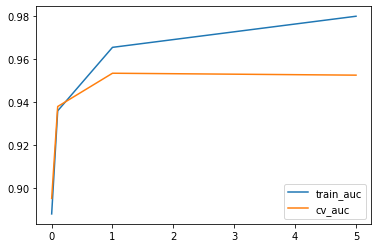

In [0]:
plt.plot(c,tfgram_trauc,label='train_auc')
plt.plot(c,tfgram_cvauc,label='cv_auc')
plt.legend()
plt.show()

In [0]:
log2=LogisticRegression(C=1)
log2.fit(finalgram_tr,y_train.values)
testgram_predict=log2.predict(finalgram_tr)
testgram_predictcv=log2.predict(finalgram_cv)

In [0]:
testgram_predicttest=log2.predict(finalgram_test)

In [0]:
testgram_predicttest.shape

(1953,)

In [0]:
a=test_text.loc[:,['id']]
a.loc[:,'label']=testgram_predicttest

In [0]:
a.to_csv('/content/drive/My Drive/NLP/Project1-Sentiment Analysis/predict.csv')

In [0]:
f1_score(y_train,testgram_predict,average='weighted')

0.9055165914738665

In [0]:
f1_score(y_cv,testgram_predictcv,average='weighted')

0.8831444581374511

In [0]:
from sklearn.svm import LinearSVC

In [0]:
c=[0.001,0.1,1,5]
tfgramtr_svc=[]
tfgramcv_svc=[]
for i in c:
  svc=LinearSVC(C=i)
  svc.fit(finalgram_tr,y_train.values)
  predicted_trgr=svc.predict(finalgram_tr)
  predicted_cvgr=svc.predict(finalgram_cv)
  train_aucgr=roc_auc_score(y_train.values,predicted_trgr)
  cv_aucgr=roc_auc_score(y_cv.values,predicted_cvgr)
  tfgramtr_svc.append(train_aucgr)
  tfgramcv_svc.append(cv_aucgr)

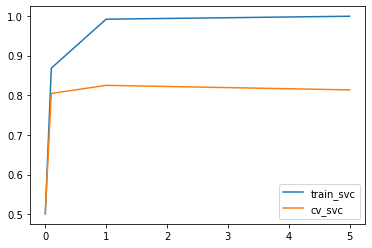

In [0]:
plt.plot(c,tfgramtr_svc,label='train_svc')
plt.plot(c,tfgramcv_svc,label='cv_svc')
plt.legend()
plt.show()

In [0]:
svc1=LinearSVC(C=0.1)
svc1.fit(finalgram_tr,y_train.values)
svc_predict=svc1.predict(finalgram_tr)
svc_predictcv=svc1.predict(finalgram_cv)

In [0]:
f1_score(y_train,svc_predict,average='weighted')

0.915700301756314

In [0]:
f1_score(y_cv,svc_predictcv,average='weighted')

0.8784959665577453